## **Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline


from scipy import stats
from scipy.stats import kurtosis
from scipy.stats import skew

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

import six
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#from autosklearn.classification import AutoSklearnClassifier

import tensorflow as tf

import pickle
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Read the data**

In [3]:
train = pd.read_csv("/content/drive/My Drive/AnalyticVidya/Jobathon/train.csv")
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [4]:
test = pd.read_csv("/content/drive/My Drive/AnalyticVidya/Jobathon/test.csv")
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [5]:
print("Train data contains % 2d rows and % 2d columns" %(train.shape[0],train.shape[1]), "\n")
print("Test data contains {} rows and {} columns" .format(test.shape[0],test.shape[1]))

Train data contains  245725 rows and  11 columns 

Test data contains 105312 rows and 10 columns


### **Looking for Target Data using python**

In [6]:
for columns in train.columns:
  if columns not in test.columns:
    print("Column not present in the Test Data is: ", columns)

Column not present in the Test Data is:  Is_Lead


## **EDA**

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [8]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,245725.0,4.385631e+01,14.828672,23.0,30.0,43.0,54.0,85.0
Vintage,245725.0,4.695914e+01,32.353136,7.0,20.0,32.0,73.0,135.0
Avg_Account_Balance,245725.0,1.128403e+06,852936.356069,20790.0,604310.0,894601.0,1366666.0,10352009.0
Is_Lead,245725.0,2.372083e-01,0.425372,0.0,0.0,0.0,0.0,1.0


In [9]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,105312.0,4.387100e+01,14.872890,24.0,30.00,43.0,54.00,85.0
Vintage,105312.0,4.684282e+01,32.273634,7.0,20.00,32.0,73.00,135.0
Avg_Account_Balance,105312.0,1.134195e+06,866242.989426,22597.0,603982.25,896634.5,1371598.25,9908858.0


## **Merging the Train and Test Dataset**

In [10]:
labelData = train['Is_Lead']
trainNew = train.copy()
trainNew.drop(['Is_Lead'], axis=1,inplace=True)
df = pd.concat([trainNew.assign(ind="train"), test.assign(ind="test")])
df

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,ind
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,train
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,train
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,train
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,train
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,train
...,...,...,...,...,...,...,...,...,...,...,...
105307,DBENJOYI,Male,52,RG268,Salaried,X2,86,Yes,4242558,Yes,test
105308,CWQ72DWS,Male,55,RG277,Other,X2,86,Yes,1159153,No,test
105309,HDESC8GU,Male,35,RG254,Salaried,X4,15,No,1703727,No,test
105310,2PW4SFCA,Male,53,RG254,Other,X3,93,No,737178,Yes,test


## **Identifying Numerical and Categorical Columns**

In [11]:
categoricalData = [column for column in df.columns if df[column].dtype == object ]
print("Categorical Columns in data are: ", categoricalData)

numericalData  = [column for column in df.columns if df[column].dtype != object]
print("Numerical Columns in data are: ", numericalData)

Categorical Columns in data are:  ['ID', 'Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active', 'ind']
Numerical Columns in data are:  ['Age', 'Vintage', 'Avg_Account_Balance']


## **Visualizing the Data**

In [12]:
newCatData = categoricalData
newCatData.remove('ID')
newCatData.remove('ind')

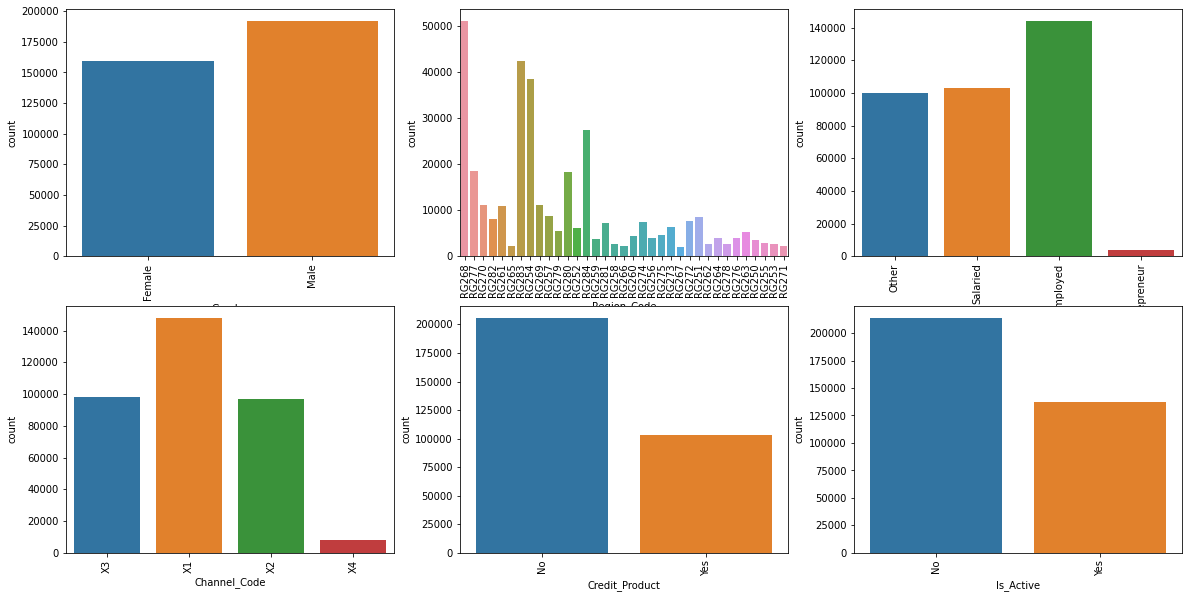

In [13]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
for column, subplot in zip(newCatData, ax.flatten()):
  if (column == 'ID') | (column == 'ind'):
    continue
  else:
    sns.countplot(df[column], ax=subplot)
    for label in subplot.get_xticklabels():
      label.set_rotation(90)

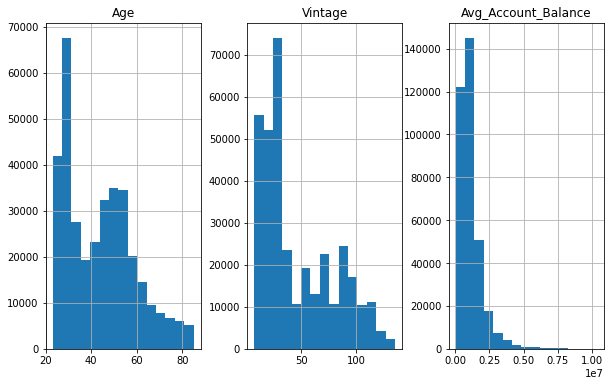

In [14]:
df[numericalData].hist(bins=15, figsize=(10, 6), layout=(1, 3));

In [15]:
df.skew()

Age                    0.621864
Vintage                0.790512
Avg_Account_Balance    2.978170
dtype: float64

## **Data Preprocessing**

In [16]:
df.duplicated().any()

False

In [17]:
for column in numericalData:
  if(df[column] < 0).any():
    print("Negative Value present in column: ", column)
  else:
    print("No Negative Value present in column: ", column)

No Negative Value present in column:  Age
No Negative Value present in column:  Vintage
No Negative Value present in column:  Avg_Account_Balance


In [18]:
df.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         41847
Avg_Account_Balance        0
Is_Active                  0
ind                        0
dtype: int64

In [19]:
print("Train data missing value: ", train['Credit_Product'].isnull().sum())
print("Test data missing value:", test['Credit_Product'].isnull().sum())

Train data missing value:  29325
Test data missing value: 12522


In [20]:
df['Credit_Product'] = df['Credit_Product'].fillna(df['Credit_Product'].mode()[0])
df['Credit_Product'].isnull().sum()

0

In [21]:
for column in numericalData:
  Q1,Q3 = np.nanpercentile(df[column] , [25,75])
  IQR = Q3 - Q1
  cutOff = 1.5 * IQR
  lower_range = Q1 - cutOff
  upper_range = Q3 + cutOff
  print("Column is {} Q1 Value is {} Q3 value is {} lower bound is {} and upper bound is {}".format(column,Q1,Q3,lower_range,upper_range))

Column is Age Q1 Value is 30.0 Q3 value is 54.0 lower bound is -6.0 and upper bound is 90.0
Column is Vintage Q1 Value is 20.0 Q3 value is 73.0 lower bound is -59.5 and upper bound is 152.5
Column is Avg_Account_Balance Q1 Value is 604185.0 Q3 value is 1368152.0 lower bound is -541765.5 and upper bound is 2514102.5


In [ ]:
# df[df['Avg_Account_Balance'] > 2514102]

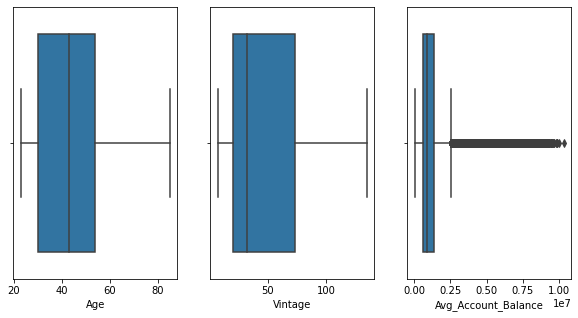

In [22]:
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
for column, subplot in zip(numericalData, ax.flatten()):
  sns.boxplot(df[column], ax=subplot)

In [23]:
power = PowerTransformer(method='yeo-johnson', standardize=True) 
columnName = df['Avg_Account_Balance'].values.reshape(-1,1)
df['Avg_Account_Balance'] = power.fit_transform(columnName)

df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,ind
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,0.238836,No,train
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,-0.728736,No,train
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,0.786146,Yes,train
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,-1.096857,No,train
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,-0.026628,No,train


## **Categorical to Numeric**

In [ ]:
# newCatData.remove('Region_Code')

In [24]:
df = pd.get_dummies(df, columns=newCatData)
df.head(1)

,ID,Age,Vintage,Avg_Account_Balance,ind,Gender_Female,Gender_Male,Region_Code_RG250,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,Region_Code_RG256,Region_Code_RG257,Region_Code_RG258,Region_Code_RG259,Region_Code_RG260,Region_Code_RG261,Region_Code_RG262,Region_Code_RG263,Region_Code_RG264,Region_Code_RG265,Region_Code_RG266,Region_Code_RG267,Region_Code_RG268,Region_Code_RG269,Region_Code_RG270,Region_Code_RG271,Region_Code_RG272,Region_Code_RG273,Region_Code_RG274,Region_Code_RG275,Region_Code_RG276,Region_Code_RG277,Region_Code_RG278,Region_Code_RG279,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No,Credit_Product_Yes,Is_Active_No,Is_Active_Yes
0,NNVBBKZB,73,43,0.238836,train,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0


In [25]:
df.shape

(351037, 54)

## **Spliting Train Data and Test Data CSV Files**

In [26]:
data_test, data_train = df[df["ind"].eq("test")], df[df["ind"].eq("train")]
data_train.drop(['ind'], axis=1, inplace=True)
data_train['Is_Lead'] = labelData
data_test.drop(['ind'], axis=1, inplace=True)
print('Train Data shape: ', data_train.shape)
print("Test Data shape: ", data_test.shape, "\n")

Train Data shape:  (245725, 54)
Test Data shape:  (105312, 53) 



## **Check Balanced or Unbalanced Data**

In [27]:
data_train['Is_Lead'].value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

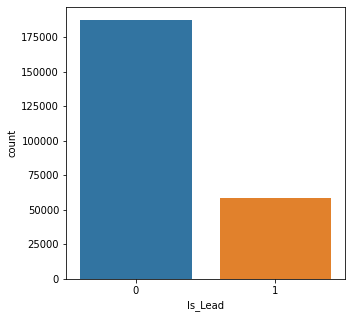

In [28]:
plt.figure(figsize=(5,5))
sns.countplot(data_train['Is_Lead'])

## **Data Collinearity**

In [ ]:
data_train.corr()

,Age,Vintage,Avg_Account_Balance,Gender_Female,Gender_Male,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No,Credit_Product_Yes,Is_Active_No,Is_Active_Yes,Is_Lead
Age,1.000000,0.631242,0.145232,-0.152076,0.152076,0.028095,0.394834,-0.563227,0.152652,-0.664600,0.273153,0.456338,0.009252,-0.129865,0.129865,-0.218770,0.218770,0.230814
Vintage,0.631242,1.000000,0.167433,-0.146380,0.146380,0.073515,0.155663,-0.410109,0.221024,-0.571828,0.144931,0.538829,-0.162419,-0.095078,0.095078,-0.209356,0.209356,0.279642
Avg_Account_Balance,0.145232,0.167433,1.000000,-0.022477,0.022477,0.035203,0.060387,-0.071691,0.003467,-0.098179,0.010163,0.106906,-0.027096,-0.046030,0.046030,-0.076637,0.076637,0.053370
Gender_Female,-0.152076,-0.146380,-0.022477,1.000000,-1.000000,-0.017630,-0.025818,0.122439,-0.085863,0.184372,-0.116018,-0.080782,-0.019916,0.042976,-0.042976,0.064207,-0.064207,-0.072068
Gender_Male,0.152076,0.146380,0.022477,-1.000000,1.000000,0.017630,0.025818,-0.122439,0.085863,-0.184372,0.116018,0.080782,0.019916,-0.042976,0.042976,-0.064207,0.064207,0.072068
Occupation_Entrepreneur,0.028095,0.073515,0.035203,-0.017630,0.017630,1.000000,-0.066228,-0.067435,-0.087424,-0.075128,0.027859,0.053577,0.004105,-0.074811,0.074811,-0.010250,0.010250,0.104280
Occupation_Other,0.394834,0.155663,0.060387,-0.025818,0.025818,-0.066228,1.000000,-0.407017,-0.527661,-0.104278,0.000466,0.119213,-0.014854,-0.016770,0.016770,-0.028119,0.028119,0.011509
Occupation_Salaried,-0.563227,-0.410109,-0.071691,0.122439,-0.122439,-0.067435,-0.407017,1.000000,-0.537284,0.590747,-0.323820,-0.307399,-0.061205,0.112922,-0.112922,0.207638,-0.207638,-0.117351
Occupation_Self_Employed,0.152652,0.221024,0.003467,-0.085863,0.085863,-0.087424,-0.527661,-0.537284,1.000000,-0.434991,0.293304,0.163663,0.069401,-0.073321,0.073321,-0.164130,0.164130,0.076042
Channel_Code_X1,-0.664600,-0.571828,-0.098179,0.184372,-0.184372,-0.075128,-0.104278,0.590747,-0.434991,1.000000,-0.527158,-0.532459,-0.130141,0.184004,-0.184004,0.292109,-0.292109,-0.292903


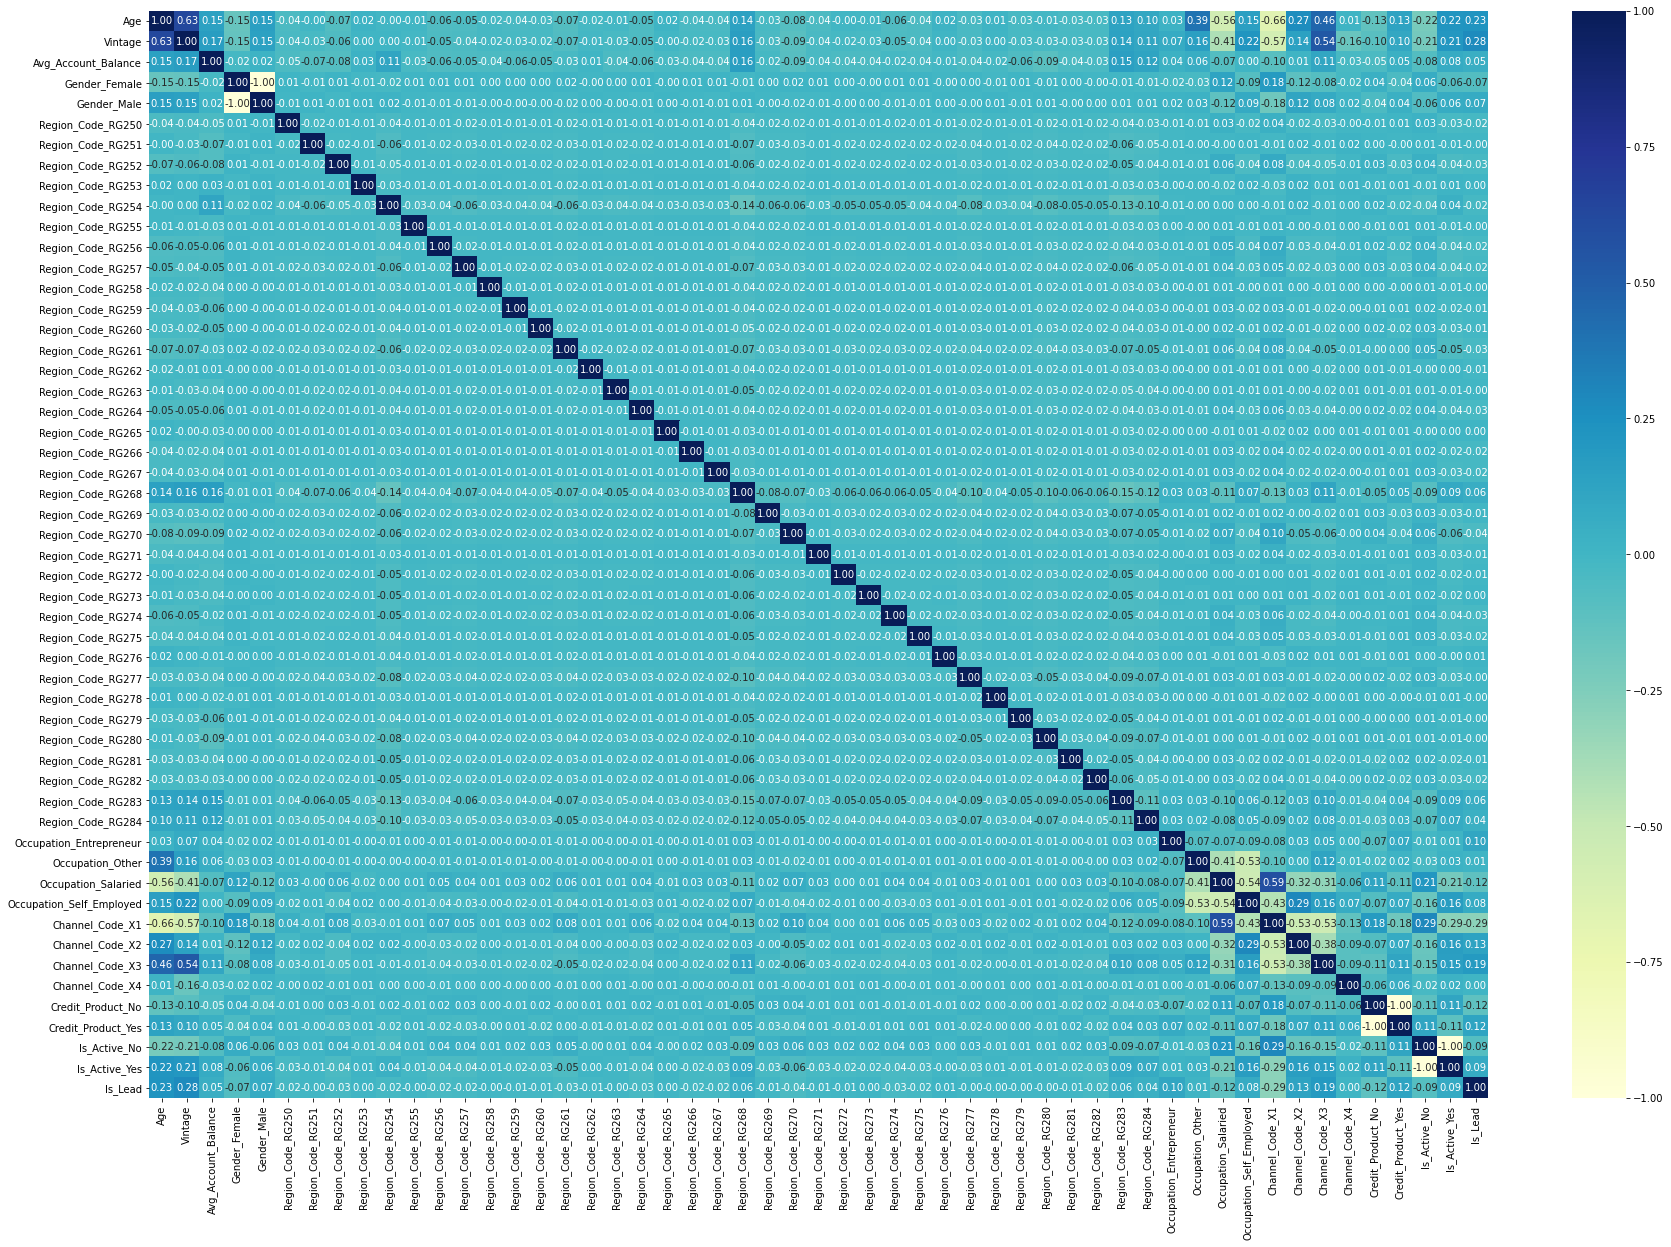

In [ ]:
plt.figure(figsize=(30,20))
sns.heatmap(data_train.corr(), annot=True, cmap='YlGnBu', fmt='.2f')

## **Resampling and Feature and Label Separation**

In [30]:
creditCardAccept = data_train[data_train['Is_Lead']==1]
creditCardReject = data_train[data_train['Is_Lead']==0]

In [31]:
print(creditCardAccept.shape)
print(creditCardReject.shape)

(58288, 54)
(187437, 54)


In [32]:
creditCardReject = creditCardReject.sample(creditCardAccept.shape[0])
creditCardReject.shape

(58288, 54)

In [33]:
data = creditCardAccept.append(creditCardReject, ignore_index=True)
data

,ID,Age,Vintage,Avg_Account_Balance,Gender_Female,Gender_Male,Region_Code_RG250,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,Region_Code_RG256,Region_Code_RG257,Region_Code_RG258,Region_Code_RG259,Region_Code_RG260,Region_Code_RG261,Region_Code_RG262,Region_Code_RG263,Region_Code_RG264,Region_Code_RG265,Region_Code_RG266,Region_Code_RG267,Region_Code_RG268,Region_Code_RG269,Region_Code_RG270,Region_Code_RG271,Region_Code_RG272,Region_Code_RG273,Region_Code_RG274,Region_Code_RG275,Region_Code_RG276,Region_Code_RG277,Region_Code_RG278,Region_Code_RG279,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No,Credit_Product_Yes,Is_Active_No,Is_Active_Yes,Is_Lead
0,ETQCZFEJ,62,20,0.255597,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1
1,UJ2NJKKL,33,69,-0.932266,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1
2,CNGSPYWS,46,97,1.428394,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,1
3,VH7NBNNQ,59,15,1.491957,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,1
4,7PMYNWB3,44,19,0.170025,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116571,TZAPLOWE,29,14,-0.463242,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0
116572,AZHFYYGB,29,33,-0.513458,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0
116573,XKTMXK8E,44,87,0.013975,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0
116574,LD2V4W4E,27,32,0.386294,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0


In [38]:
features = data.drop(['ID',"Is_Lead"], axis=1)
label = data['Is_Lead']

## **Train Test Split from Train Data CSV**

In [39]:
seed = 33
X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state = seed)

## **Handling Imbalanced Data**

### **SMOTE**

In [31]:
print("Count of 1 class in training set before upsampling :" ,(sum(y_train==1)))
print("Count of 0 class in training set before upsampling :",(sum(y_train==0)))

Count of 1 class in training set before upsampling : 46634
Count of 0 class in training set before upsampling : 149946


In [33]:
smote = SMOTE(sampling_strategy = 1 ,k_neighbors = 3, random_state=33) 

In [34]:
X_train_new, y_train_new = smote.fit_sample(X_train, y_train.ravel())

In [35]:
print("Count of 1 class in training set after upsampling  :" ,(sum(y_train_new==1)))
print("Count of 0 class in training set after upsampling  :",(sum(y_train_new==0)))

Count of 1 class in training set after upsampling  : 149946
Count of 0 class in training set after upsampling  : 149946


In [36]:
y_test.ravel()

array([0, 0, 0, ..., 1, 0, 1])

### **Undersampling**

In [32]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=33, replacement=True)
X_res, y_res = rus.fit_resample(X_train, y_train)

from collections import Counter
print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 149946, 1: 46634})
Resampled dataset shape Counter({0: 46634, 1: 46634})


## **Model Building**

### **Logistic Regression**

In [ ]:
lr = LogisticRegression()
modelLR = lr.fit(X_train_new,y_train_new)
print(modelLR.score(X_train_new,y_train_new))
print(modelLR.score(X_test,y_test))

print(modelLR.predict_proba(X_test)[:,1])

0.5
0.23713500864787873
[0.5132413  0.50670663 0.50697032 ... 0.51248793 0.50625113 0.52813644]


0.5522332453204477


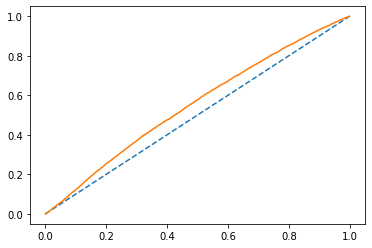

In [ ]:
#Step1: Extract the prob of true value for your label (1)
probabilityValues = modelLR.predict_proba(X_test)[:,1]

#Step2: Calc AUC
auc = roc_auc_score(y_test, probabilityValues)

#Step3: Plot the Skill line (0,0) (1,1)
plt.plot([0,1],[0,1] , linestyle='--')

#Step4: Plot ROC
fpr,tpr,_ = roc_curve(y_test , probabilityValues)

plt.plot(fpr,tpr)
print(auc)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,modelLR.predict(X_test))

array([[    0, 37491],
       [    0, 11654]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,modelLR.predict(X_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     36656
           1       0.15      1.00      0.27      6624

    accuracy                           0.15     43280
   macro avg       0.08      0.50      0.13     43280
weighted avg       0.02      0.15      0.04     43280



### **KNN**


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
modelKNN = KNeighborsClassifier(n_neighbors=7)
modelKNN.fit(X_train_new,y_train_new)
print("Training score is: ", modelKNN.score(X_train_new,y_train_new))
print("Testing score is: ", modelKNN.score(X_test,y_test))

Training score is:  0.7910814559908234
Testing score is:  0.5968867636585614


0.5503809997526289


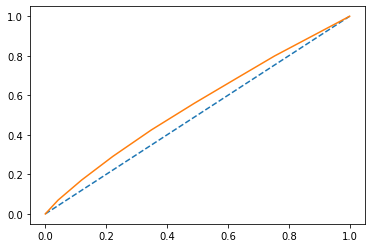

In [ ]:
#Step1: Extract the prob of true value for your label (1)
probabilityValues = modelKNN.predict_proba(X_test)[:,1]

#Step2: Calc AUC
auc = roc_auc_score(y_test, probabilityValues)

#Step3: Plot the Skill line (0,0) (1,1)
plt.plot([0,1],[0,1] , linestyle='--')

#Step4: Plot ROC
fpr,tpr,_ = roc_curve(y_test , probabilityValues)

plt.plot(fpr,tpr)
print(auc)

In [ ]:
# 1-> 0 (Not Tolerable)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,modelKNN.predict(X_test))

array([[23890, 12766],
       [ 3811,  2813]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,modelKNN.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.65      0.74     36656
           1       0.18      0.42      0.25      6624

    accuracy                           0.62     43280
   macro avg       0.52      0.54      0.50     43280
weighted avg       0.76      0.62      0.67     43280



### **XGBClassifier**

In [40]:
xgb = XGBRFClassifier()
modelXGB = xgb.fit(X_train,y_train)

train_score = modelXGB.score(X_train,y_train)
test_score = modelXGB.score(X_test,y_test)
print("Test : {} Train: {}".format(test_score,train_score))

Test : 0.6776033624978556 Train: 0.6759811280291658


Feature: 0, Score: 0.10224
Feature: 1, Score: 0.07003
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00528
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

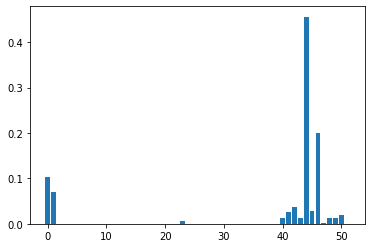

In [50]:
# get importance
importance = modelXGB.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

0.7595251686444869


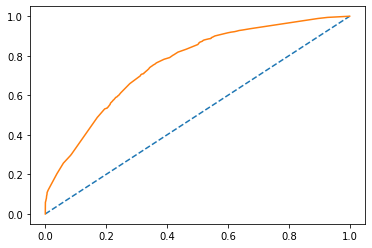

In [51]:
#Step1: Extract the prob of true value for your label (1)
probabilityValues = modelXGB.predict_proba(X_test)[:,1]

#Step2: Calc AUC
auc = roc_auc_score(y_test, probabilityValues)

#Step3: Plot the Skill line (0,0) (1,1)
plt.plot([0,1],[0,1] , linestyle='--')

#Step4: Plot ROC
fpr,tpr,_ = roc_curve(y_test , probabilityValues)

plt.plot(fpr,tpr)
print(auc)

In [ ]:
for i in range(1,101):
    X_train,X_test,y_train,y_test = train_test_split(features,
                                                    label,
                                                    test_size=0.2,
                                                    random_state=i)
    
    model = XGBClassifier()
    model.fit(X_train,y_train)
    
    train_score = model.score(X_train,y_train)
    test_score = model.score(X_test,y_test)
    print("Test : {} Train: {} RS: {}".format(test_score,train_score,i))

Test : 0.7161605764282039 Train: 0.7143577096289943 RS: 1
Test : 0.7178761365585864 Train: 0.7148509543212525 RS: 2
Test : 0.7141019042717447 Train: 0.7156766030452498 RS: 3
Test : 0.7163750214445016 Train: 0.7156873257559511 RS: 4
Test : 0.7188196946302968 Train: 0.7142183143898777 RS: 5


### **Using Pipeline**

In [ ]:
def ModelTypes():
  modelType = []
  modelType.append(('LogisticRegression'   , make_pipeline(StandardScaler(),LogisticRegression())))
  modelType.append(('KNN'   , make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=2))))
  modelType.append(('ExtraTreesClassifier', make_pipeline(StandardScaler(), ExtraTreesClassifier(n_jobs=-1, min_samples_leaf=1, max_depth=20, min_samples_split=3, n_estimators=1000))))
  modelType.append(('DecisionTree'  , make_pipeline(StandardScaler(), DecisionTreeClassifier())))
  modelType.append(('RandomForest'   , make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators= 19, max_depth= 21.183668300467755, n_jobs=-1))))
  modelType.append(('XGBRF'  , make_pipeline(StandardScaler(), XGBRFClassifier(n_jobs=-1, silent=True))))
  modelType.append(('GradientBoostingRegressor', make_pipeline(StandardScaler(), GradientBoostingClassifier(criterion='mse',random_state=2,max_depth=5,n_estimators=500,min_samples_split=2,min_samples_leaf=2))))
  modelType.append(('XGBRegressor', make_pipeline(StandardScaler(), XGBClassifier(n_estimators=500,max_depth=5,booster='gbtree',n_jobs=-1,learning_rate=0.1,reg_lambda=0.01,reg_alpha=0.3)))) 
  
  return modelType

In [ ]:
def ModelBuilding(X_train, y_train, models):
  num_folds = 10
  scoring = 'accuracy'
  SEED = 33
  modelScoreDict = {}
  for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=SEED)
    cv_results = cross_val_score(model, X_train_new, y_train_new, cv=kfold, scoring = scoring)
    modelScoreDict[name] = cv_results
    scores = "{}: {} ({})" .format(name, cv_results.mean(), cv_results.std())
    print(scores)

  return modelScoreDict

In [ ]:
%%time
models = ModelTypes()
modelScoreDict = ModelBuilding(X_res, y_res, models)

In [38]:
gbr = GradientBoostingClassifier(criterion='mse',random_state=2,max_depth=5,n_estimators=500,min_samples_split=2,min_samples_leaf=2)
et = ExtraTreesClassifier(n_jobs=-1, min_samples_leaf=1, max_depth=20, min_samples_split=3, n_estimators=1000)
xgb = XGBClassifier(n_estimators=500,max_depth=5,booster='gbtree',n_jobs=-1,learning_rate=0.1,reg_lambda=0.01,reg_alpha=0.3)
rt = RandomForestClassifier()

In [ ]:
%%time

modelFinal = VotingClassifier([('gbr', gbr),('xgb',xgb),('et', et),('rt',rt)],n_jobs=-1)
modelVC = modelFinal.fit(X_train_new, y_train_new)

#pred = modelVC.predict(X_test)
print(modelVC.score(X_train_new,y_train_new))
print(modelVC.score(X_test,y_test))

0.5522332453204477


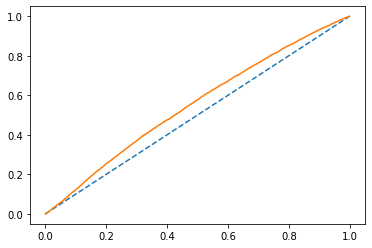

In [ ]:
#Step1: Extract the prob of true value for your label (1)
probabilityValues = modelVC.predict_proba(X_test)[:,1]

#Step2: Calc AUC
auc = roc_auc_score(y_test, probabilityValues)

#Step3: Plot the Skill line (0,0) (1,1)
plt.plot([0,1],[0,1] , linestyle='--')

#Step4: Plot ROC
fpr,tpr,_ = roc_curve(y_test , probabilityValues)

plt.plot(fpr,tpr)
print(auc)

### **Tensorflow Keras**

In [ ]:
seed = 2500

X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state = seed)
tf.random.set_seed(seed)
np.random.seed(seed)

In [ ]:
# Architect the model
model = tf.keras.models.Sequential()
# using units = 3*4 
# input shape = 4
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense( units = 256, activation= 'relu',input_dim = 17))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense( units = 128, activation= 'relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense( units = 64, activation= 'relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense( units = 32, activation= 'relu'))
model.add(tf.keras.layers.Dense( units = 1, activation= 'sigmoid' ))

# Compile model
model.compile(#optimizer = "Adam" , 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])


#Custom Callback
class MyThresholdCallback(tf.keras.callbacks.Callback):
    def __init__(self, cl):
        super(MyThresholdCallback, self).__init__()
        self.cl = cl
        
    def on_epoch_end(self, epoch, logs=None):
        test_score = logs["val_accuracy"]
        train_score = logs["accuracy"]
        if ( test_score > train_score and test_score > self.cl ) or test_score == 1 :
            self.model.stop_training = True
            

myScoreMonitor = MyThresholdCallback(cl=0.8)

epoch_hist = model.fit(X_train_new,
                       y_train_new,
                       epochs=50,
                       validation_data=(X_test,y_test),
                       callbacks= [myScoreMonitor] )

In [ ]:
plt.plot(epoch_hist.history['accuracy'])
plt.plot(epoch_hist.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy' ])

### **DNN**

In [ ]:
from sklearn.metrics import recall_score
from sklearn.neural_network import MLPClassifier

MLPC = MLPClassifier(hidden_layer_sizes=(200,), max_iter=10000)
MLPCModel = MLPC.fit(X_train_new, y_train_new)
y_pred = MLPCModel.predict(X_test)
# Obtenemos valores de recall
recall_acc = recall_score (y_test,y_pred)
recall_acc 

0.7038264537511298

### **Tensorflow Keras**

In [ ]:
seed = 2500

X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state = seed)
tf.random.set_seed(seed)
np.random.seed(seed)

In [ ]:
# Architect the model
model = tf.keras.models.Sequential()
# using units = 3*4 
# input shape = 4
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense( units = 256, activation= 'relu',input_dim = 17))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense( units = 128, activation= 'relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense( units = 64, activation= 'relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense( units = 32, activation= 'relu'))
model.add(tf.keras.layers.Dense( units = 1, activation= 'sigmoid' ))

# Compile model
model.compile(#optimizer = "Adam" , 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])


#Custom Callback
class MyThresholdCallback(tf.keras.callbacks.Callback):
    def __init__(self, cl):
        super(MyThresholdCallback, self).__init__()
        self.cl = cl
        
    def on_epoch_end(self, epoch, logs=None):
        test_score = logs["val_accuracy"]
        train_score = logs["accuracy"]
        if ( test_score > train_score and test_score > self.cl ) or test_score == 1 :
            self.model.stop_training = True
            

myScoreMonitor = MyThresholdCallback(cl=0.8)

epoch_hist = model.fit(X_train_new,
                       y_train_new,
                       epochs=50,
                       validation_data=(X_test,y_test),
                       callbacks= [myScoreMonitor] )

In [ ]:
plt.plot(epoch_hist.history['accuracy'])
plt.plot(epoch_hist.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy' ])

### **DNN**

In [ ]:
from sklearn.metrics import recall_score
from sklearn.neural_network import MLPClassifier

MLPC = MLPClassifier(hidden_layer_sizes=(200,), max_iter=10000)
MLPCModel = MLPC.fit(X_train_new, y_train_new)
y_pred = MLPCModel.predict(X_test)
# Obtenemos valores de recall
recall_acc = recall_score (y_test,y_pred)
recall_acc 

0.7038264537511298

## **Predicting Data**

In [43]:
# featuresTest = data_test.drop(['ID'], axis=1)

In [44]:
predValue = modelXGB.predict(featuresTest)

In [45]:
print("The length of the predicted vlue is: {}".format(len(predValue)), "\n")
print(predValue)

The length of the predicted vlue is: 105312 

[0 1 0 ... 1 1 0]


In [46]:
finalDataFrame = test.loc[:,['ID']]
finalDataFrame['Is_Lead'] = predValue 

In [47]:
finalDataFrame

,ID,Is_Lead
0,VBENBARO,0
1,CCMEWNKY,1
2,VK3KGA9M,0
3,TT8RPZVC,0
4,SHQZEYTZ,0
...,...,...
105307,DBENJOYI,1
105308,CWQ72DWS,1
105309,HDESC8GU,1
105310,2PW4SFCA,1


In [48]:
finalDataFrame.to_csv('/content/drive/My Drive/AnalyticVidya/Jobathon/predictionData.csv', header=True, index=False)